<a href="https://colab.research.google.com/github/SharathChandra-AV/Data-Science--Cheat-Sheet/blob/master/Expedia_CaseStudy_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
################## EXPEDIA ONLINE TEST ##############################################
#Case study- Expedia Group Data Scientist role || Sharath
#Rachit Chandra <rchandra@expediagroup.com>
#Dec 13, 2019, 12:33 PM (3 days ago)
#to me
# Hi Sharath,
# It was pleasure talking to you. As discussed sharing the case study with you.
# Please complete this test. You have 48 hours to complete it :
# Register on the following link:
# https://www.kaggle.com/t/05d0aed2c4a34c4c88f29c24debfd9c6
# Post which for the test – please access the following link
# Kaggle: Your Home for Data Science
#####################################################################################

# In this task, we ask you to train a model that learns to rank properties.
# Hotels.com travellers provide their trip information, like destination, holiday dates and number of people in the search.
# Our search engine then returns a list of properties, ranked by their relevance to that traveller.
# We provide you a data set with this travel information augmented by some features we have found to be predictive,
# including search-level features like booking window (length of time between booking the trip and taking it), and 
# property-level features, like the country the property is in.
# Please feel free to model with all, some or none of these, or create your own features.
# The label in this data set is booking_bool, indicating whether this property was the one that was booked by the customer.
# Please provide justification for your metric for this ranking task.

################# VARIABLES ############################
# srch_id: unique identifier for a search
# visitor_id: visitor id used to submit the search
# visitor_visit_nbr: count of visits for the user who has submitted the search
# visitor_loc_country: country of the user who has submitted the search
# visitor_loc_region: region of the user who has submitted the search
# visitor_loc_city: city of the user who has submitted the search
# visitor_wr_member: indicates if the user who has submitted the search is part of the hcom loyalty program
# posa_continent: point of sale continent for a partiular search
# posa_country: point of sale country for a particular search
# srch_hcom_destination_id: destination id for a particular search
# srch_dest_longitude: destination center longitude for a particular search
# srch_dest_latitude: destination center latitude for a particular search
# srch_ci: date of check-in of a search
# srch_co: date of cehck-in of a search
# srch_ci_day: day of check-in of a search
# srch_co_day: day of check-out of a search
# srch_los: length of stay of a search (check-in - check-out date)
# srch_bw: booking window of a search (search-date - check-in date)
# srch_adults_cnt: number of adults for a search
# srch_children_cnt: number of children for a search
# srch_rm_cnt: number of requested rooms on the search
# mobile_bool: indicates if the search was submitted on a mobile browser
# mobile_app: indicates if the search was submitted on a mobile app
# device: identifies the device type type used for this search
# currency: currency relevant for the point of sale the search was submitted form
# travelad_bool: indicates if a porperty in a search was a paid advert
# dotd_bool: indicates if a property in a search was advertised as a special "daily deal"
# price_without_discount_local: discounted property price in local (posa specific) currency
# price_without_discount_usd: discounted property price in USD
# price_with_discount_local: non-discounted property price in local currency
# price_with_discount_usd: non-discounted property price in USD
# imp_drr: name of the pricing/discount rule relevant for this property
# booking_bool: indicates if property has been booken in a given search
# prop_key: unique property identifier
# prop_brand_bool: indicates if a property has a popular brand
# prop_starrating: conventional hotel star rating (1-5 Stars)
# prop_super_region: the super region this property belongs to (EMEA, APAC, NA, LATAM)
# prop_continent: continent this property is located on (Europe, North-America, South-America, ..... )
# prop_country: country this property is located in
# prop_market_id: higher granularity geo classification
# prop_submarket_id: highest granularity geo classification
# prop_room_capacity: max number of rooms this property has available
# prop_review_score: average guest review score for this property
# prop_review_count: count of customer reviews for this property
# prop_hostel_bool: indicates if a property is a hostel
# local_date: date for a particular search

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
from datetime import datetime
from scipy import stats
from prettytable import PrettyTable

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
 
#import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, f1_score, log_loss, roc_curve, precision_score, roc_auc_score

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [18]:
file_list = drive.ListFile({'q': "'1_fTILE5VGpurrlaCmMbT6_dH7bfK7Oq2' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

title: train.csv.zip, id: 1v1AqiEUpV6gle6YLsaYbJx3bXuG2E9k1
title: train.csv, id: 1W0ly7KFHplzIwdAaJ0SptELjJsOkMpq0
title: train (1).csv, id: 1WNYX3VP_A1F3g7-iYjRMsVhjx3lWvlXC
title: test.csv.zip, id: 1ukKdYhSfJSHgg51XdZ7xYZ0FPXqYmjtR
title: test.csv, id: 1NL2UDBGlgCFnedIsfQNf5-FDD-HFx6H_
title: test (1).csv, id: 17UA6-El0j7CSyeWHqhusKoRjr8Bgz6ia
title: submission.csv, id: 15ZHNu_nLIdbGXrKDdAigflBJtn7Yjc2q
title: submission (2).csv, id: 18aHVTU8MAaH-XujqBUY97FNA-zyN3crw
title: solution.csv, id: 12AihSeAD0Q_myLrmpKbWSqO10QwSz94O
title: popSub.csv, id: 13s-_JMIoesKH9VWWcUwot6sBSJosazO5
title: ExampleSubmission.csv, id: 13jYMi39kHaoKhf3UGxiLPr10zVIuYzA6
title: a_train.csv, id: 1Dp5f0LAeDp5yHOtWSSAUfV9HphxpLPUQ
title: a_test.csv, id: 1RyeEARWG8SXN2B64KB5aabi2b9IAWpll
title: a_submission.csv, id: 1nhpRqF5i7Ot_ozrVskmO_MrYA6guyW6Y
title: a_solution.csv, id: 1KwBaJ51IMVHC_4WGVglMlwAesM65nsrN


In [0]:
filepath = "C:\\Expedia\\sortranking\\"
inputfile = "train.csv"

In [0]:
train_downloaded = drive.CreateFile({'id': '1W0ly7KFHplzIwdAaJ0SptELjJsOkMpq0'})
train_downloaded.GetContentFile('train.csv')
input = pd.read_csv('train.csv')

In [22]:
t = PrettyTable()
t.title = 'Expedia Train File'
t.field_names = ['Col','Type','TotalValCnt','UniqueValCnt','NullValCnt','Reqd4Anlys?']
print(input.shape)
for i in input.columns:
    bReqd = True
    if((input[i].nunique() == 1) |  (((sum(pd.isnull(input[i])))/((input.shape[0])*100)) > 90)):
        bReqd = False
    t.add_row([i, input[i].dtype, input[i].value_counts().sum(), input[i].nunique(), sum(pd.isnull(input[i])), bReqd])
t

(844240, 50)


In [0]:
print(t)

+-----------------------------------+---------+-------------+--------------+------------+-------------+
|                Col                |   Type  | TotalValCnt | UniqueValCnt | NullValCnt | Reqd4Anlys? |
+-----------------------------------+---------+-------------+--------------+------------+-------------+
|              srch_id              |  int64  |    844240   |    23791     |     0      |     True    |
|           srch_date_time          |  object |    844240   |    23649     |     0      |     True    |
|          srch_visitor_id          |  object |    844240   |    22894     |     0      |     True    |
|       srch_visitor_visit_nbr      |  int64  |    844240   |     266      |     0      |     True    |
|      srch_visitor_loc_country     |  object |    844240   |     154      |     0      |     True    |
|      srch_visitor_loc_region      |  object |    844130   |     598      |    110     |     True    |
|       srch_visitor_loc_city       |  object |    844240   |   

In [0]:
# Drop the variable which are not relevant from the above observations
input.drop('srch_mobile_app', axis=1, inplace=True)

In [0]:
# numericcols = []
# for i in input.columns:
#     if ( (input[i].dtype=='float64')):
#         numericcols.append(i)
# input_n = input[numericcols]
# input_n.plot(kind='box', figsize=[16,8])

2.0


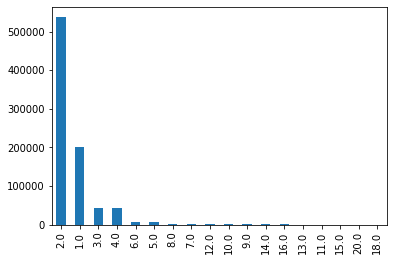

In [24]:
# Impute the 'srch_adults_cnt' column....
print(input['srch_adults_cnt'].value_counts().idxmax())
fig,ax = plt.subplots()
input['srch_adults_cnt'].value_counts().plot(ax=ax, kind='bar');
plt.show()
input['srch_adults_cnt'].fillna(input['srch_adults_cnt'].value_counts().idxmax(), inplace=True)

0.0


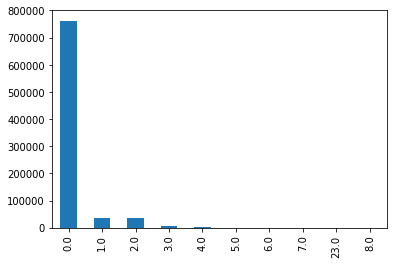

In [25]:
print(input['srch_children_cnt'].value_counts().idxmax())
fig,ax = plt.subplots()
input['srch_children_cnt'].value_counts().plot(ax=ax, kind='bar');
plt.show()
input['srch_children_cnt'].fillna(input['srch_children_cnt'].value_counts().idxmax(), inplace=True)

USD


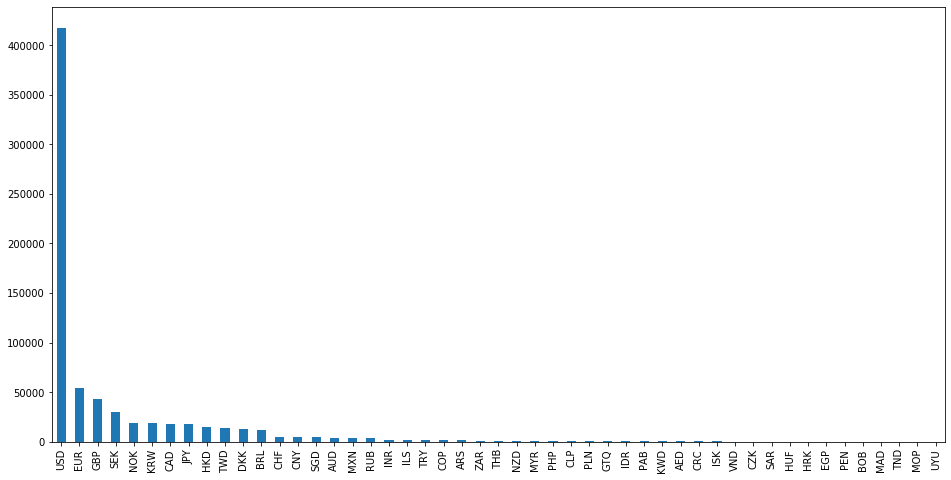

In [26]:
# Impute the 'srch_adults_cnt' column....
print(input['srch_currency'].value_counts().idxmax())
fig,ax = plt.subplots()
input['srch_currency'].value_counts().plot(ax=ax, kind='bar', figsize=[16,8]);
plt.show()
input['srch_currency'].fillna(input['srch_adults_cnt'].value_counts().idxmax(), inplace=True)